In [38]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('books.csv')

Q1.How many rows and columns are there in books.csv dataset?


In [39]:
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 399
Number of columns: 24


In [40]:
df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0
3,82,1845,1845,3284484,108,385486804,9.780385e+12,Jon Krakauer,1996.0,Into the Wild,...,665377,17299,19229,35567,135199,248287,227095,https://images.gr-assets.com/books/1403173986m...,https://images.gr-assets.com/books/1403173986s...,0
4,87,1617,1617,265616,109,374500010,9.780375e+12,"Elie Wiesel, Marion Wiesel",1958.0,Un di Velt Hot Geshvign,...,707879,22001,7761,18539,90575,230227,360777,https://images.gr-assets.com/books/1473495285m...,https://images.gr-assets.com/books/1473495285s...,0


Q2. How many books do not have an original title?


In [41]:

books_without_original_title = df[df['original_title'].isnull() | (df['original_title'] == '')]
count_books_without_original_title = len(books_without_original_title)
print(f"Number of books without an original title: {count_books_without_original_title}")


Number of books without an original title: 36


Q3.
How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing null values in the original_title column.

In [42]:
df_filtered = df.dropna(subset=['original_title'])
unique_books_count = df_filtered['book_id'].nunique()
print(f"Number of unique books based on 'book_id' after removing null values in 'original_title': {unique_books_count}")

Number of unique books based on 'book_id' after removing null values in 'original_title': 363


Q4. What is the average rating of all the books in the dataset based on ‘average_rating’?

In [43]:
average_rating = df['average_rating'].mean()
print(f"The average rating of all books in the dataset is: {average_rating:.2f}")

The average rating of all books in the dataset is: 3.98


Q5. Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.

In [44]:
books_published_in_2000 = df[df['original_publication_year'] == 2000]
count_books_published_in_2000 = len(books_published_in_2000)
print(f"Number of books published in the year 2000: {count_books_published_in_2000}")

Number of books published in the year 2000: 8


Q6. Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.

In [45]:
max_ratings_row = df[df['work_ratings_count'] == df['work_ratings_count'].max()]
max_ratings_title = max_ratings_row['original_title'].values[0]
print(f"The book with the maximum number of ratings is:")
print(max_ratings_title)

The book with the maximum number of ratings is:
Het Achterhuis: Dagboekbrieven 14 juni 1942 - 1 augustus 1944


Q7. Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding (eg: average_rating 3.0 to 3.49 will fall in bucket 3.0). Plot bar graph to show total number of books in each rating bucket.

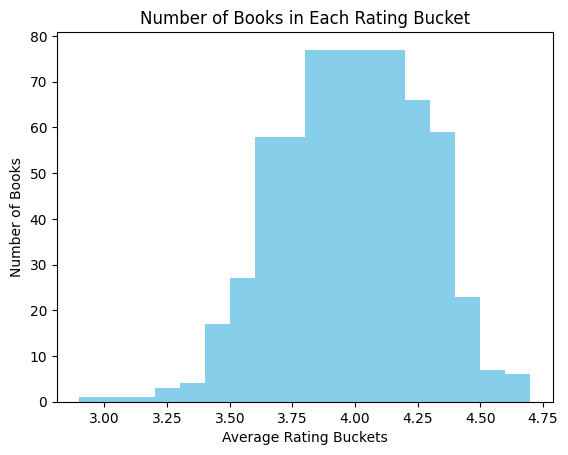

In [46]:
rating_buckets = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
df['rounded_rating'] = df['average_rating'].round(1)
rating_counts = df.groupby('rounded_rating').size()

# Plot the bar graph
plt.bar(rating_counts.index, rating_counts.values, width=0.4, align='center', color='skyblue')
plt.xlabel('Average Rating Buckets')
plt.ylabel('Number of Books')
plt.title('Number of Books in Each Rating Bucket')
plt.show()